---
## 1. <a name="1">Problem Statement</a>
* You are given a set of features extracted from the shape of the beans in images and it's required to predict the type of each bean. There are 7 bean types in this dataset

>### Data fields

>* ID - an ID for this instance
>* Area - (A), The area of a bean zone and the number of pixels within its boundaries.
>* Perimeter - (P), Bean circumference is defined as the length of its border.
>* MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
>* MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
>* AspectRatio - (K), Defines the relationship between L and l.
>* Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
>* ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
>* EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
>* Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
>* Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans
>* Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
>* Compactness - (CO), Measures the roundness of an object: Ed/L
>* ShapeFactor1 - (SF1)
>* ShapeFactor2 - (SF2)
>* ShapeFactor3 - (SF3)
>* ShapeFactor4 - (SF4)
>* y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER

### Imports

In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings

In [2]:
#---------- configs
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

pd.set_option('max_rows',100)
pd.set_option('max_columns',100)

m_cmap = sns.diverging_palette(220, 20, as_cmap=True)
n_cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark")
sns.set_style('whitegrid')

In [3]:
### loading data
df_train = pd.read_csv(r"../input/dry-beans-classification-iti-ai-pro-intake01/train.csv",index_col='ID')
df_train.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   
2   31662    653.783       239.902428       168.421505      1.424417   
3   38778    734.020       268.446281       184.061923      1.458456   
4   42530    775.403       281.212824       193.236878      1.455275   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2       0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3       0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4       0.726511       43028     232.703412  0.729816  0.988426   0.888895   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                        
0      0.685561      0.006820      0.000929      0.469994      0.998595   
1      0.896387      0.005966      0.002376      0.803510      0.997370   
2      0.836931      0.007577      0.002293      0.700453      0.997737   
3      0.827733      0.006923      0.002005      0.685142      0.999250   
4      0.827499      0.006612      0.001912      0.684755      0.996507   

           y  
ID            
0      HOROZ  
1      SEKER  
2   DERMASON  
3   DERMASON  
4       SIRA

In [4]:
## nulls and duplicates
print('Shape :',df_train.shape)
print('Nulls :' , df_train.isnull().sum().sum())
print('Duplicates :',df_train.duplicated().sum())

Shape : (10834, 17)
Nulls : 0
Duplicates : 0


#### No Nulls or Duplicates, and we have 10834 records , 17 columns.

---
## 2. <a name="2">Data Exploration</a>

>Before we jump into the statistics & numbers, 
>i will research each bean class and its shape visually (based on what i could find on the web) so we can have a meaningful image about the different shape features.

>* my search results

[![visualsupdated.png](https://i.postimg.cc/sgD9Dcz0/visualsupdated.png)](https://postimg.cc/2VMB0nV4)

>* Please Note : these photos may be misleading and even wrong. , as i didn't find any credible resources at all this is the best i could find. 

---
### Univariate Exploration
>* we will explore each **variable** distribution

* the Target Distribution

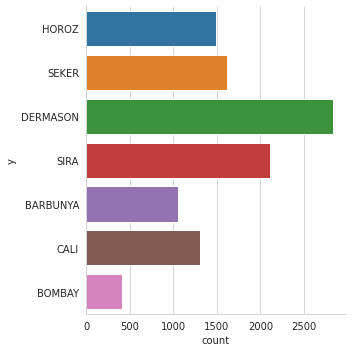

In [5]:
sns.catplot(data = df_train,y='y',kind='count',orient='horizontal')
plt.show()

* imbalanced class count.

In [6]:
def plot_distribution(df,x_cols=[],rows = 2,cell_size = 4):
    size = len(x_cols)
    cols = size // rows
    fig,axes = plt.subplots(rows,cols,figsize=(cols * cell_size, rows * cell_size))
    fig.suptitle("Variable Distribution")
    for i,axe in enumerate(axes.flatten()):
        if(i < size):
            sns.distplot(df[x_cols[i]],ax=axe,rug=True)
            median = df[x_cols[i]].median()
            axe.set_title(x_cols[i] + f' ,Median : {median:0.1f}')
            axe.axvline(median, color ='red',lw=2, alpha = 0.55)
        else:
            print('subplots > n of columns, change n of rows')
            break 
    plt.tight_layout()
    plt.show()

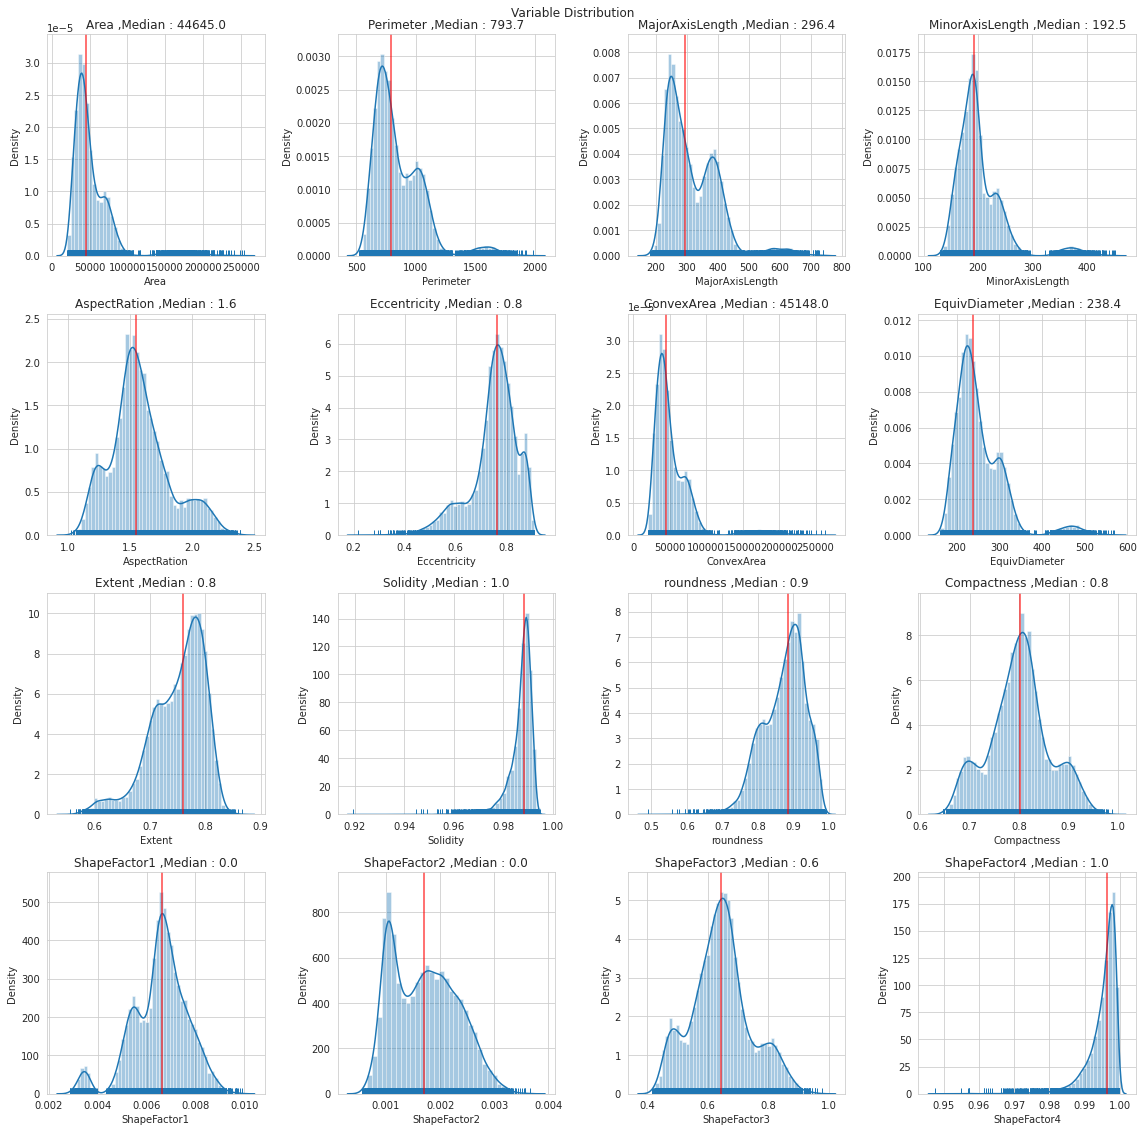

In [7]:
cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
        'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 
        'Extent', 'Solidity', 'roundness', 'Compactness', 
        'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

plot_distribution(df_train,cols,rows=4,cell_size=4)

>* **Notes on Variable Distributions :** 
    >>* mostly skewed multi-modal distributions with possible big percentage of outliers.

---
### Bivariate Exploration
>* we will explore each **class** with respect to other features such as **Area** , **Perimeter** ,.. etc 

In [8]:
def plot_categorical_distributions(df,x_cols=[],rows = 2,cell_size = 4):
    size = len(x_cols)
    cols = size // rows
    fig,axes = plt.subplots(rows,cols,figsize=(cols * cell_size, rows * cell_size),sharey=True)
    fig.suptitle("Distributions")
    for i,axe in enumerate(axes.flatten()):
        if(i < size):
            sns.violinplot(data = df_train,x=x_cols[i],y='y',orient="horizontal",palette='Set2',inner = "quartile",ax=axe)
        else:
            print('subplots > n of columns, change n of rows')
            break 
        axe.set_title(x_cols[i])
    
    plt.tight_layout()
    plt.show()

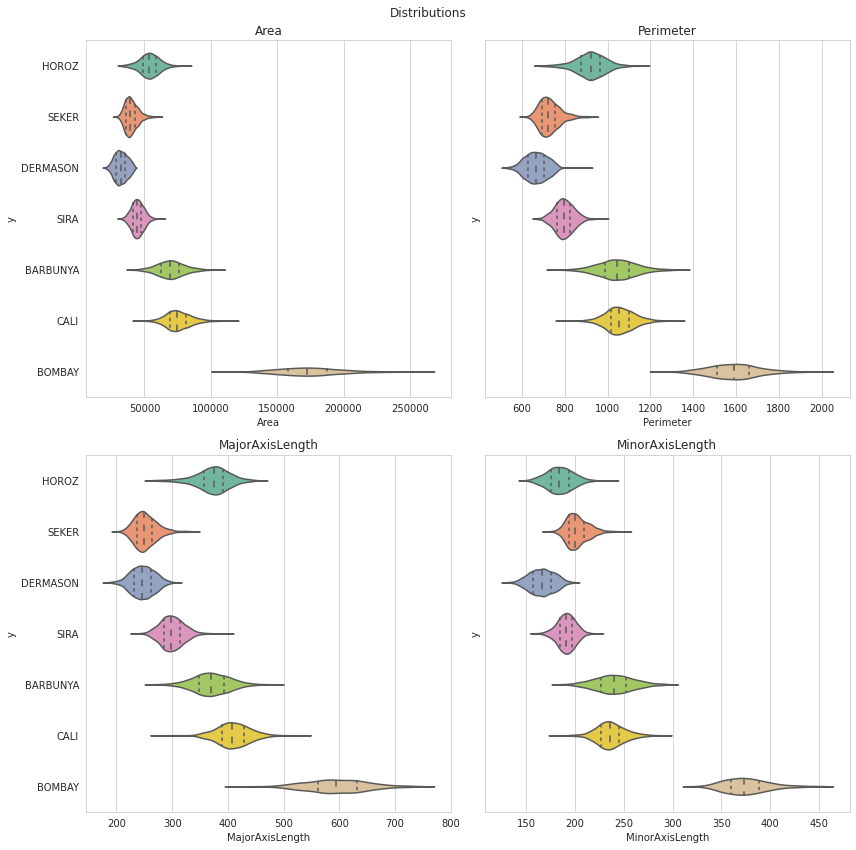

In [9]:
cat_cols = ['Area','Perimeter','MajorAxisLength', 'MinorAxisLength']
plot_categorical_distributions(df_train,cat_cols,rows=2,cell_size=6)

>* Notes on ('Area','Perimeter','MajorAxisLength', 'MinorAxisLength') Distributions : 
>* the 4 features share common informations
   >>* for each bean class , the Area and Perimeter has the same distinct distribution from the other classes.
   >>* for bombay beans has the largest [Area,Perimeter] , for the dermason has the smallest [Area,Perimeter].
   >>* Cali And Barbunya share semi equal distributions for the 4 features plotted above.

---

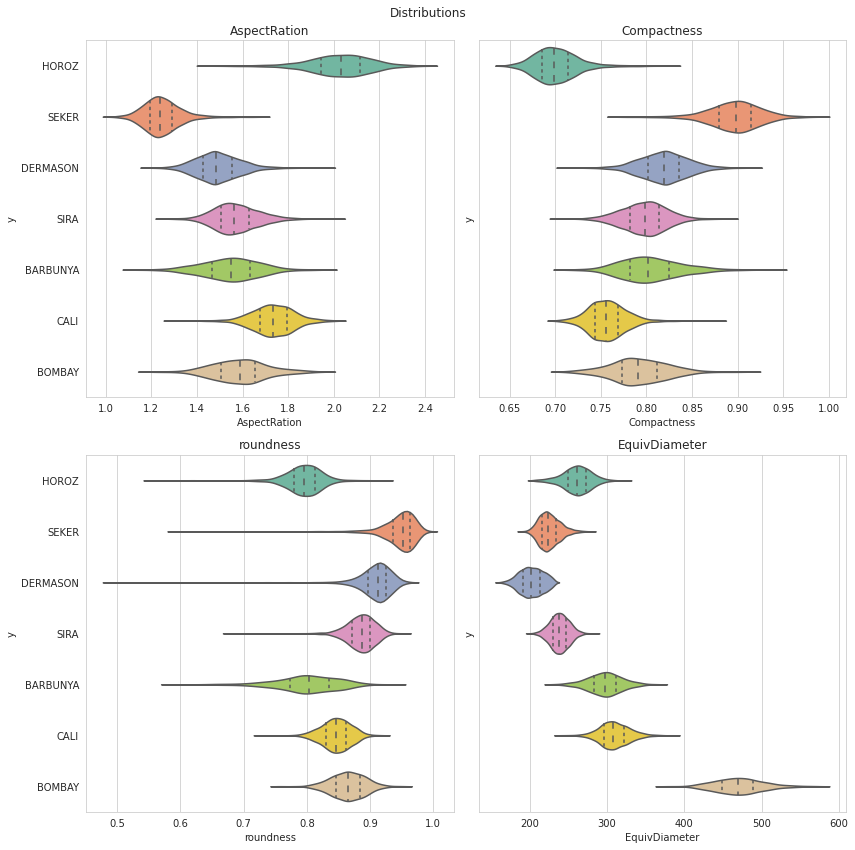

In [10]:
cat_cols = ['AspectRation', 'Compactness', 'roundness', 'EquivDiameter']
plot_categorical_distributions(df_train,cat_cols,rows=2,cell_size=6)

>* **Notes on ('AspectRation', 'Compactness', 'roundness', 'EquivDiameter') Distributions :**

>* Aspect Ratio 
   >>* Give idea on the Length/width , for example from the visual images we expect the horoz to have the highest aspect ration and seker to be closer to ~1, and this is correct according to the distribution plot. (the rest share close to similar distributions).
   
>* Compactness
   >>*  Measures the roundness of an object by the following equation: ~ an equivalent circle diameter / Length
   >>*  Seker is the most compact meaning it's close to be a circle , on the contrary horoz is the least because the aspect ratio described above.
   >>*  Cali is in the lower end also due to its aspect ratio.
    
>* Roundness
   >>*  Measures the roundness of an object by the following equation: ~  (4pi * Area)/(perimeter^2)
   >>*  Seker is the most round followed by dermason ... only one problem here , the outliers, huge skewness.
   >>*  it's not obvious to me the validity of the equation used in the calculation where depending on pixel values for (area , perimeter) it can lead to misleading info depending on the bean orientation in the 3d space.
   
>* EquivDiameter
   >>*  The diameter of a circle having the same area as a bean seed area. 
   >>*  Has similar distribution characterstic to the area, perimeter, major and minor lengths.

---

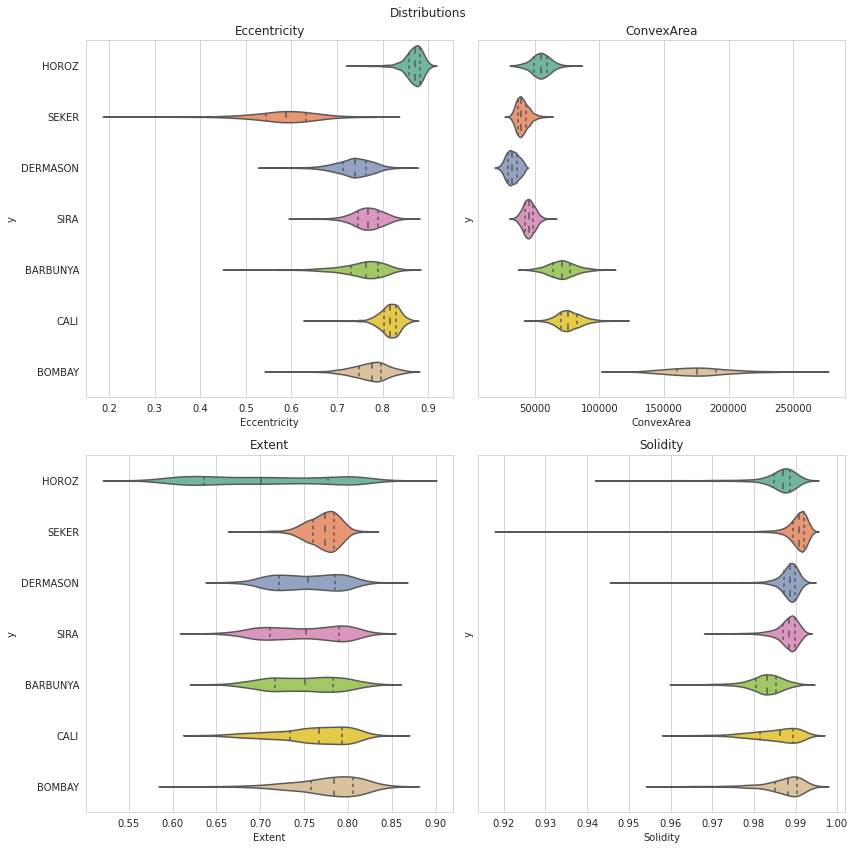

In [11]:
cat_cols = ['Eccentricity', 'ConvexArea', 'Extent','Solidity']
plot_categorical_distributions(df_train,cat_cols,rows=2,cell_size=6)

>#### Notes on ('Eccentricity', 'ConvexArea', 'Extent','Solidity') Distributions : 

>* Eccentricity
   >>* Gives idea of how much the seed is elongated , ~e=1 means a very stretched(on length) seed, ~e=0 means a circular seed.
   
>* ConvexArea
   >>*  Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
   >>*  Similar to the Area Distribution.
    
>* Extent
   >>*  The ratio of the pixels in the bounding box to the bean area.
   >>* ~Extent = 1 , when the bean is squarish (filling the bounding box).
   >>* one note , the bimodal distributions , this is clear indication of the 3D orientation for example the horoz seed is the most -elongated- seed it has bimodal distribution due to the fact of different orientations will give different extent ratio .. on the contrary the seker seed is closer to a be circlular giving close to normal distrinution..
   >>* don't know how to benefit from this, to be investigated.
   
>* Solidity
   >>*  Also known as convexity. The ratio of the pixels in the convex shell to those found in beans
   >>*  doesn't give me clear variance between the classes. to be investigated later..

---

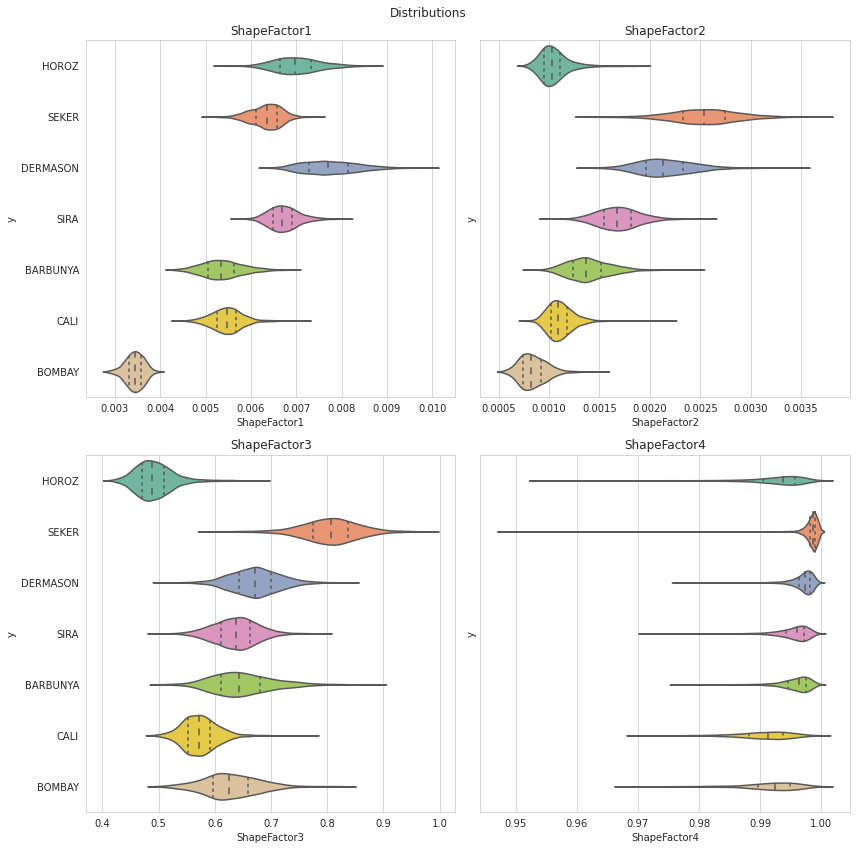

In [12]:
shapes_cols = ['ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']
plot_categorical_distributions(df_train,shapes_cols,rows=2,cell_size=6)

>#### Notes on ('ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4') Distributions : 

>* no details were given , maybe in the paper they have the reasoning behind the 4 features.
>* there is unique variance in the distributions for 'ShapeFactor1', 'ShapeFactor2'.
>* shape factor 3 is similar to shape factor 2 ,shape factor 4 has similar characteristics with Solidity attribute.

---

* Pair Plots (but with selected few features)
* a closer look into the features with better classification prospects (gathered from the violin plots above)

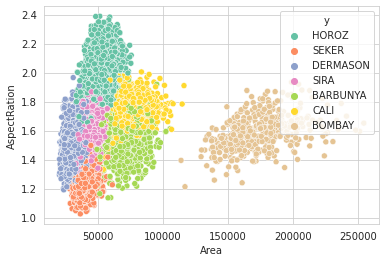

In [13]:
sns.scatterplot(data=df_train,x='Area',y='AspectRation',hue='y',palette='Set2')
plt.show()

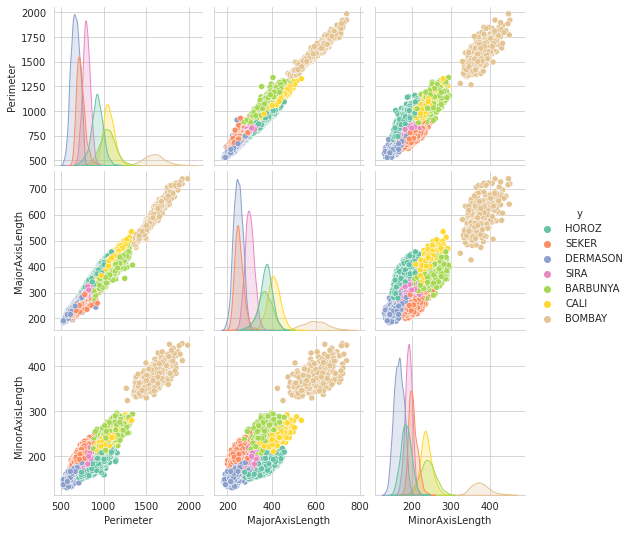

In [14]:
sns.pairplot(data=df_train[['Perimeter', 'MajorAxisLength', 'MinorAxisLength','y']],hue='y',palette='Set2')
plt.show()

* visualization of the 3 parameters in 3D space ('Perimeter', 'MajorAxisLength', 'MinorAxisLength')

In [15]:
#%matplotlib qt

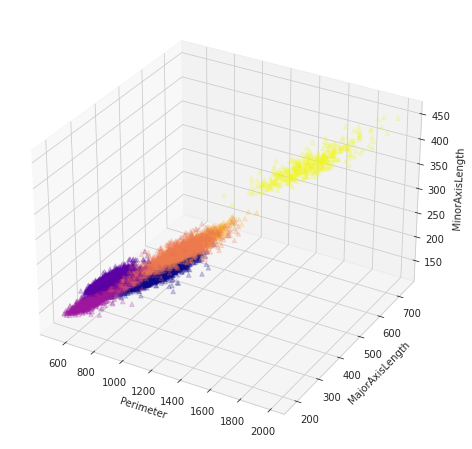

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

x = df_train['Perimeter']
y = df_train['MajorAxisLength']
z = df_train['MinorAxisLength']
color = pd.factorize(df_train['y'])[0]

ax.set_xlabel("Perimeter")
ax.set_ylabel("MajorAxisLength")
ax.set_zlabel("MinorAxisLength")

ax.scatter3D(x, y, z,c=color,alpha=0.2,cmap='plasma',marker='^')

plt.show()

In [17]:
%matplotlib inline

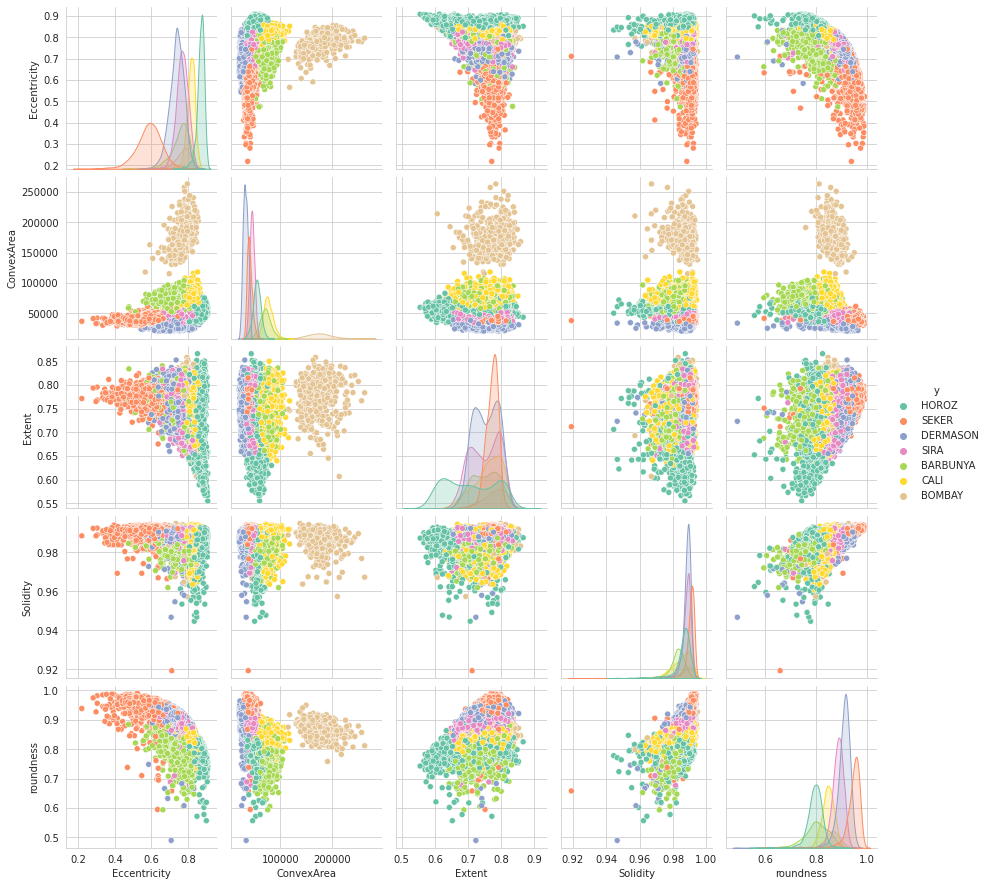

In [18]:
sns.pairplot(df_train[['Eccentricity', 'ConvexArea' , 'Extent',
       'Solidity', 'roundness','y']],hue='y',palette='Set2')
plt.show()

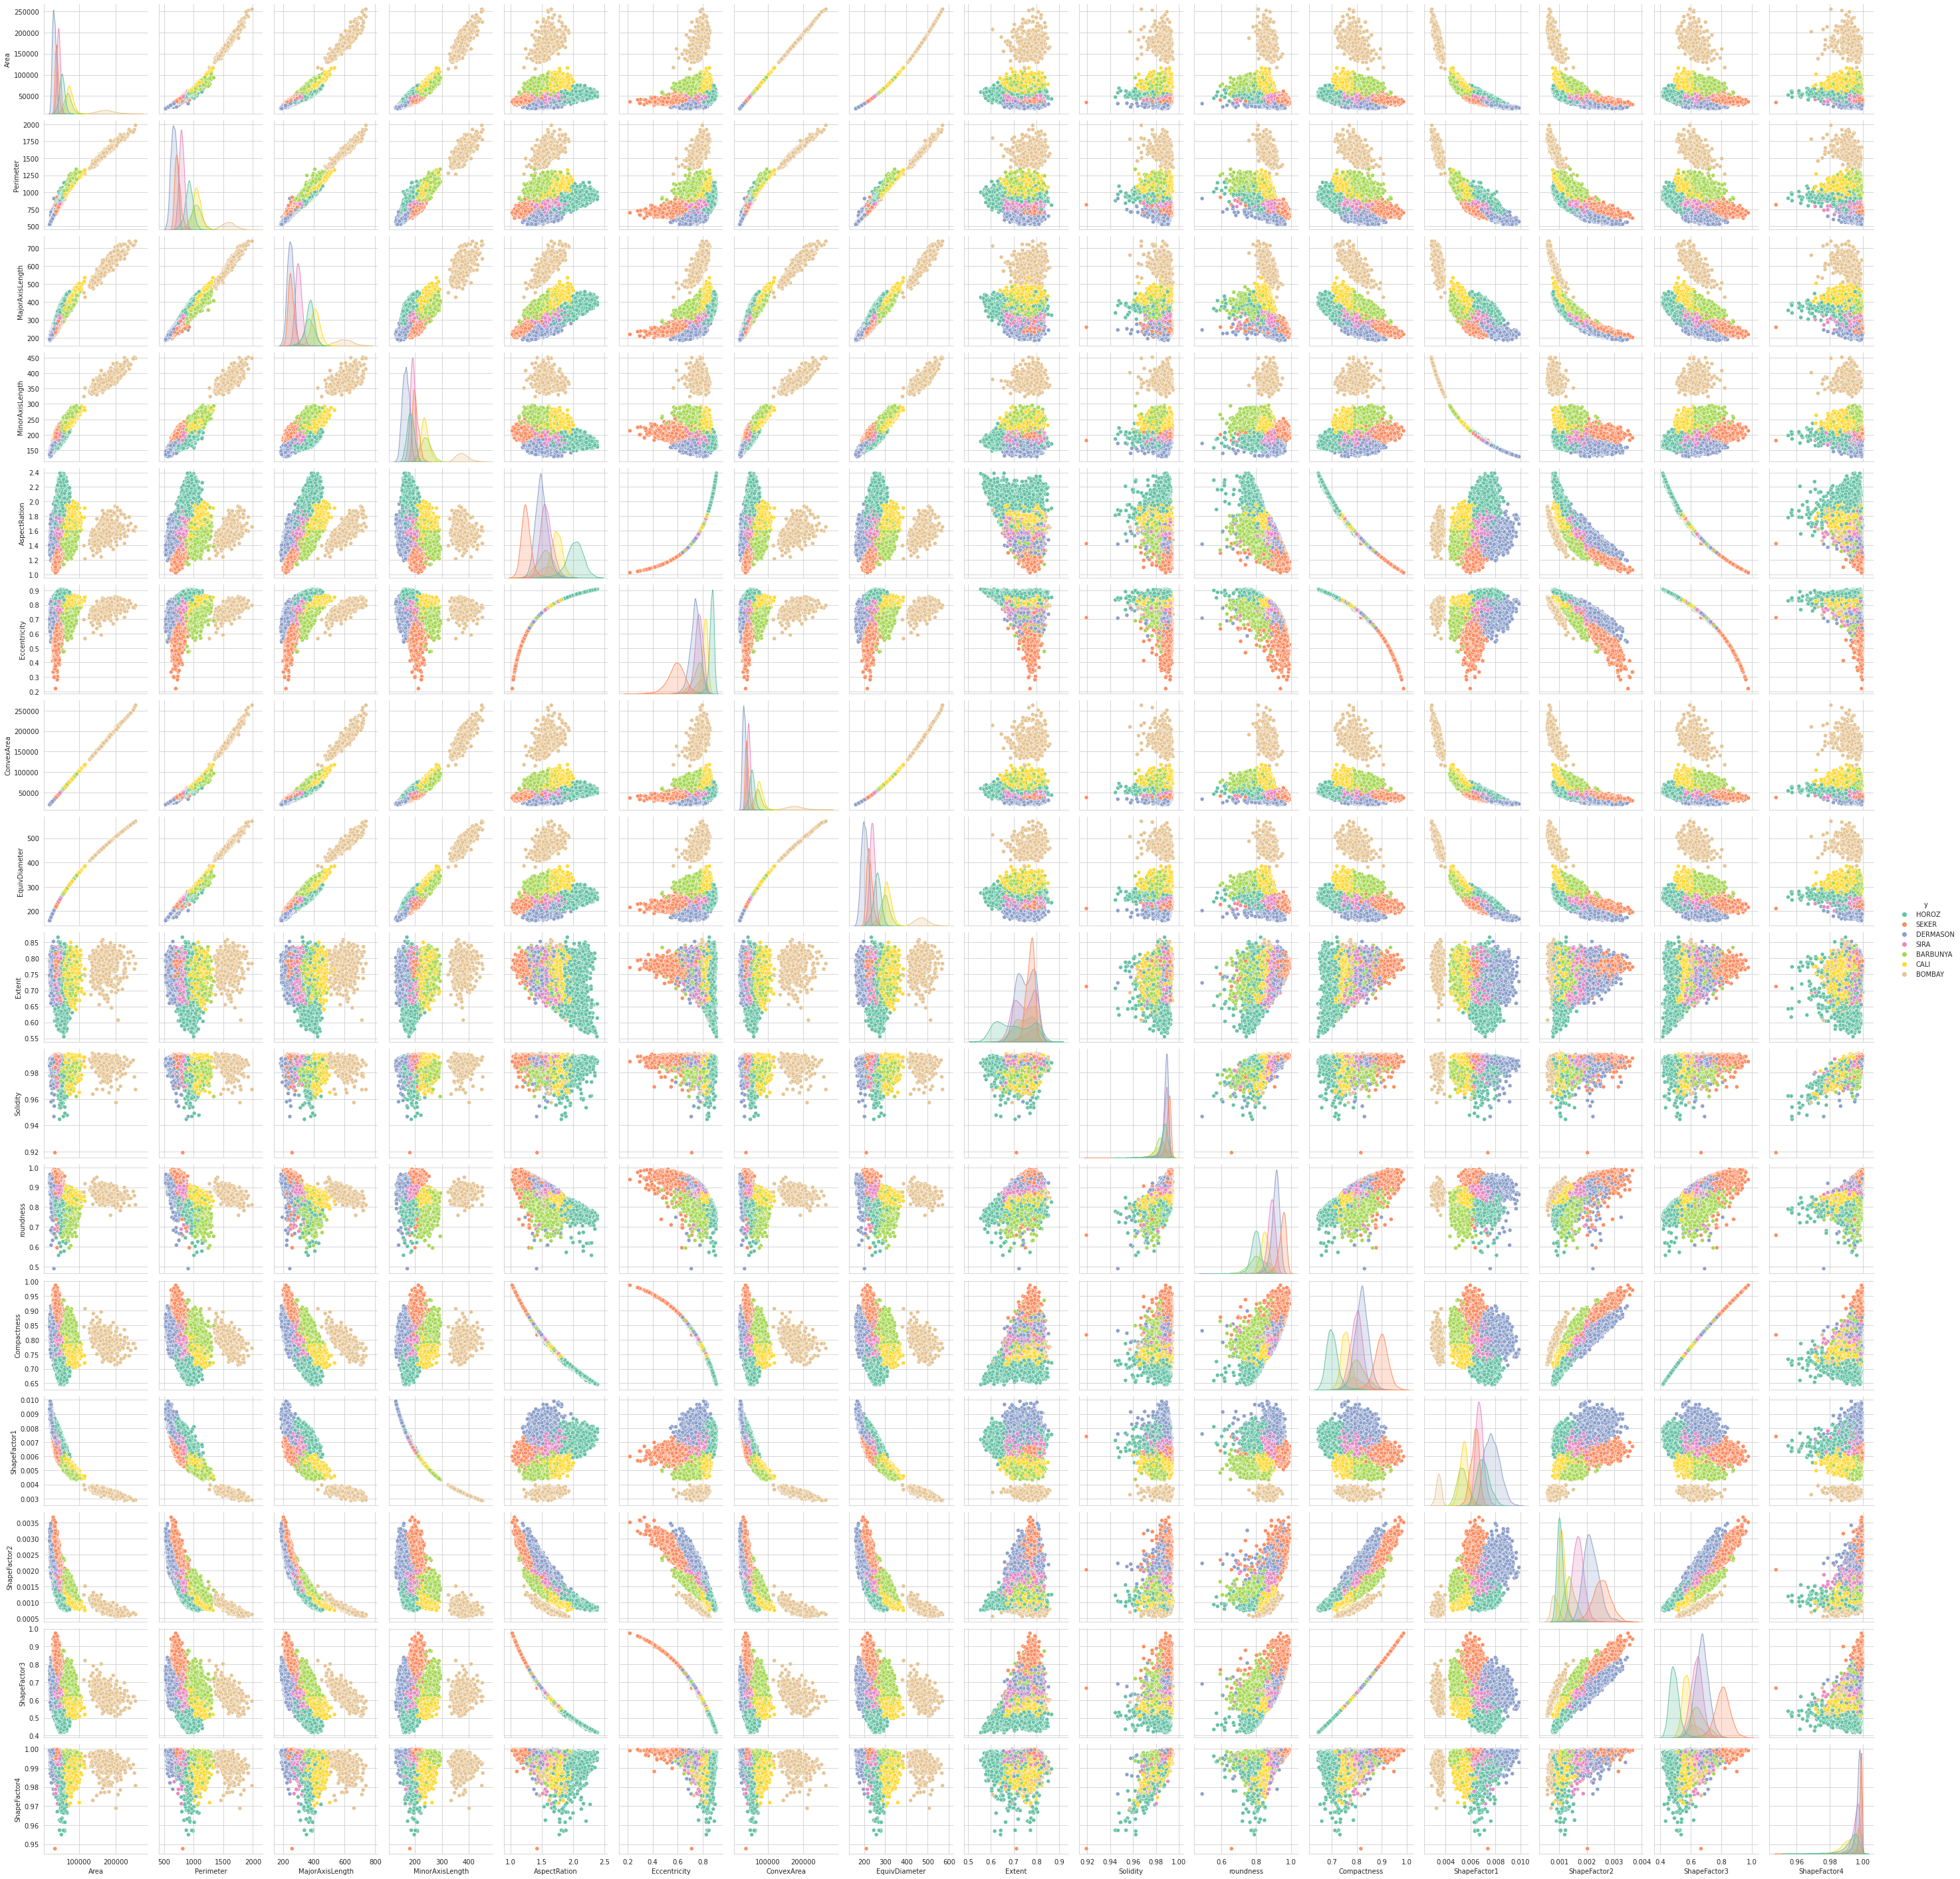

In [19]:
#--full pairplot
sns.pairplot(df_train,hue='y',palette='Set2')
plt.show()

---
### MultiVariate Exploration
>* we will explore correlations between the variables

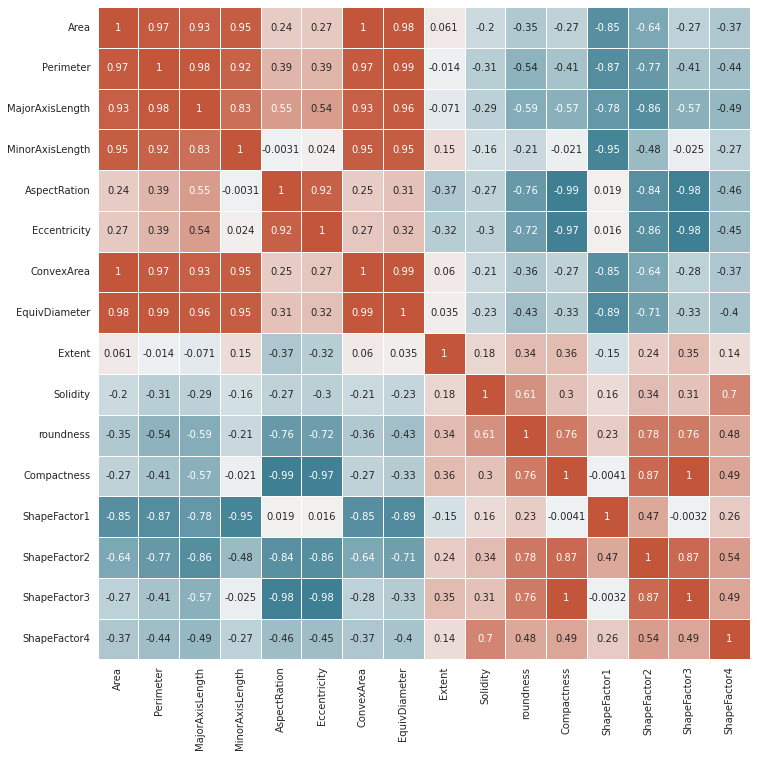

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df_train.corr(),annot=True,square=True,linewidths=1,cmap=m_cmap,cbar=False)
plt.show()

>* high correlations between :
    >>* Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','ConvexArea', 'EquivDiameter' ,'ShapeFactor1', 'ShapeFactor2'
    >>* 'AspectRation', 'Eccentricity' 
    >>* 'roundness', 'Compactness'
    >>* 'ShapeFactor2', 'ShapeFactor3'

---
## 3. <a name="3">Basic Clustering</a>
(<a href="#0">Go to top</a>)

* i will test k-means with some selected features to see have a feeling on the potential of clustering

In [21]:
from sklearn.preprocessing import MinMaxScaler
mmax_scaler = MinMaxScaler()
numerical_columns = df_train.select_dtypes(exclude='object').columns.tolist()
df_scaled = df_train.copy()
df_scaled[numerical_columns] = mmax_scaler.fit_transform(df_train[numerical_columns])

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7,random_state = 42)
selected_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','AspectRation']
fit_kmeans = kmeans.fit(df_scaled[selected_features])

In [23]:
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = fit_kmeans.labels_

In [24]:
df_clusters_counts = df_clustered.groupby(['Cluster'],as_index=True)['y'].apply(lambda x : np.unique(x,return_counts=True) )

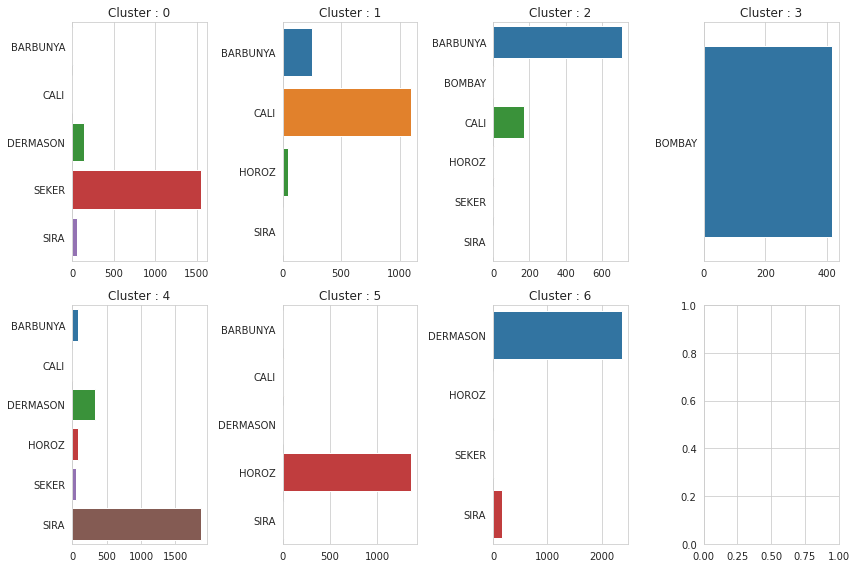

In [25]:
fig,axes = plt.subplots(2,4,figsize=(12, 8))
for i,axe in enumerate(axes.flatten()):
    if(i < len(df_clusters_counts)):
        sns.barplot(y=df_clusters_counts[i][0],x=df_clusters_counts[i][1], ax = axe)      
        axe.set_title('Cluster : ' + str(i))
plt.tight_layout()
plt.show()

>* not bad clustering results given little features used, no data processing, feature engineering ... etc
>* we can infere some characterisitcs from the overlapping inside clusters. (ex where multiple classes overlap , what are the similar properties? how to enhance the seperation by creating a new feature?

---
### Next Considerations

* Dealing with class weight imbalance
* Creating features to help seperate the overlapping properties 
* Possible potential of using clustering to aid the model performance ...  

>* I hope the exploration is helpful , i am waiting for any suggestions or new ideas